# STA160 Data Science 2021 Spring

## Part6- Unsupervised Learning

## Clustering

Overview of Clustering Methods:

for model detials see https://scikit-learn.org/stable/modules/clustering.html

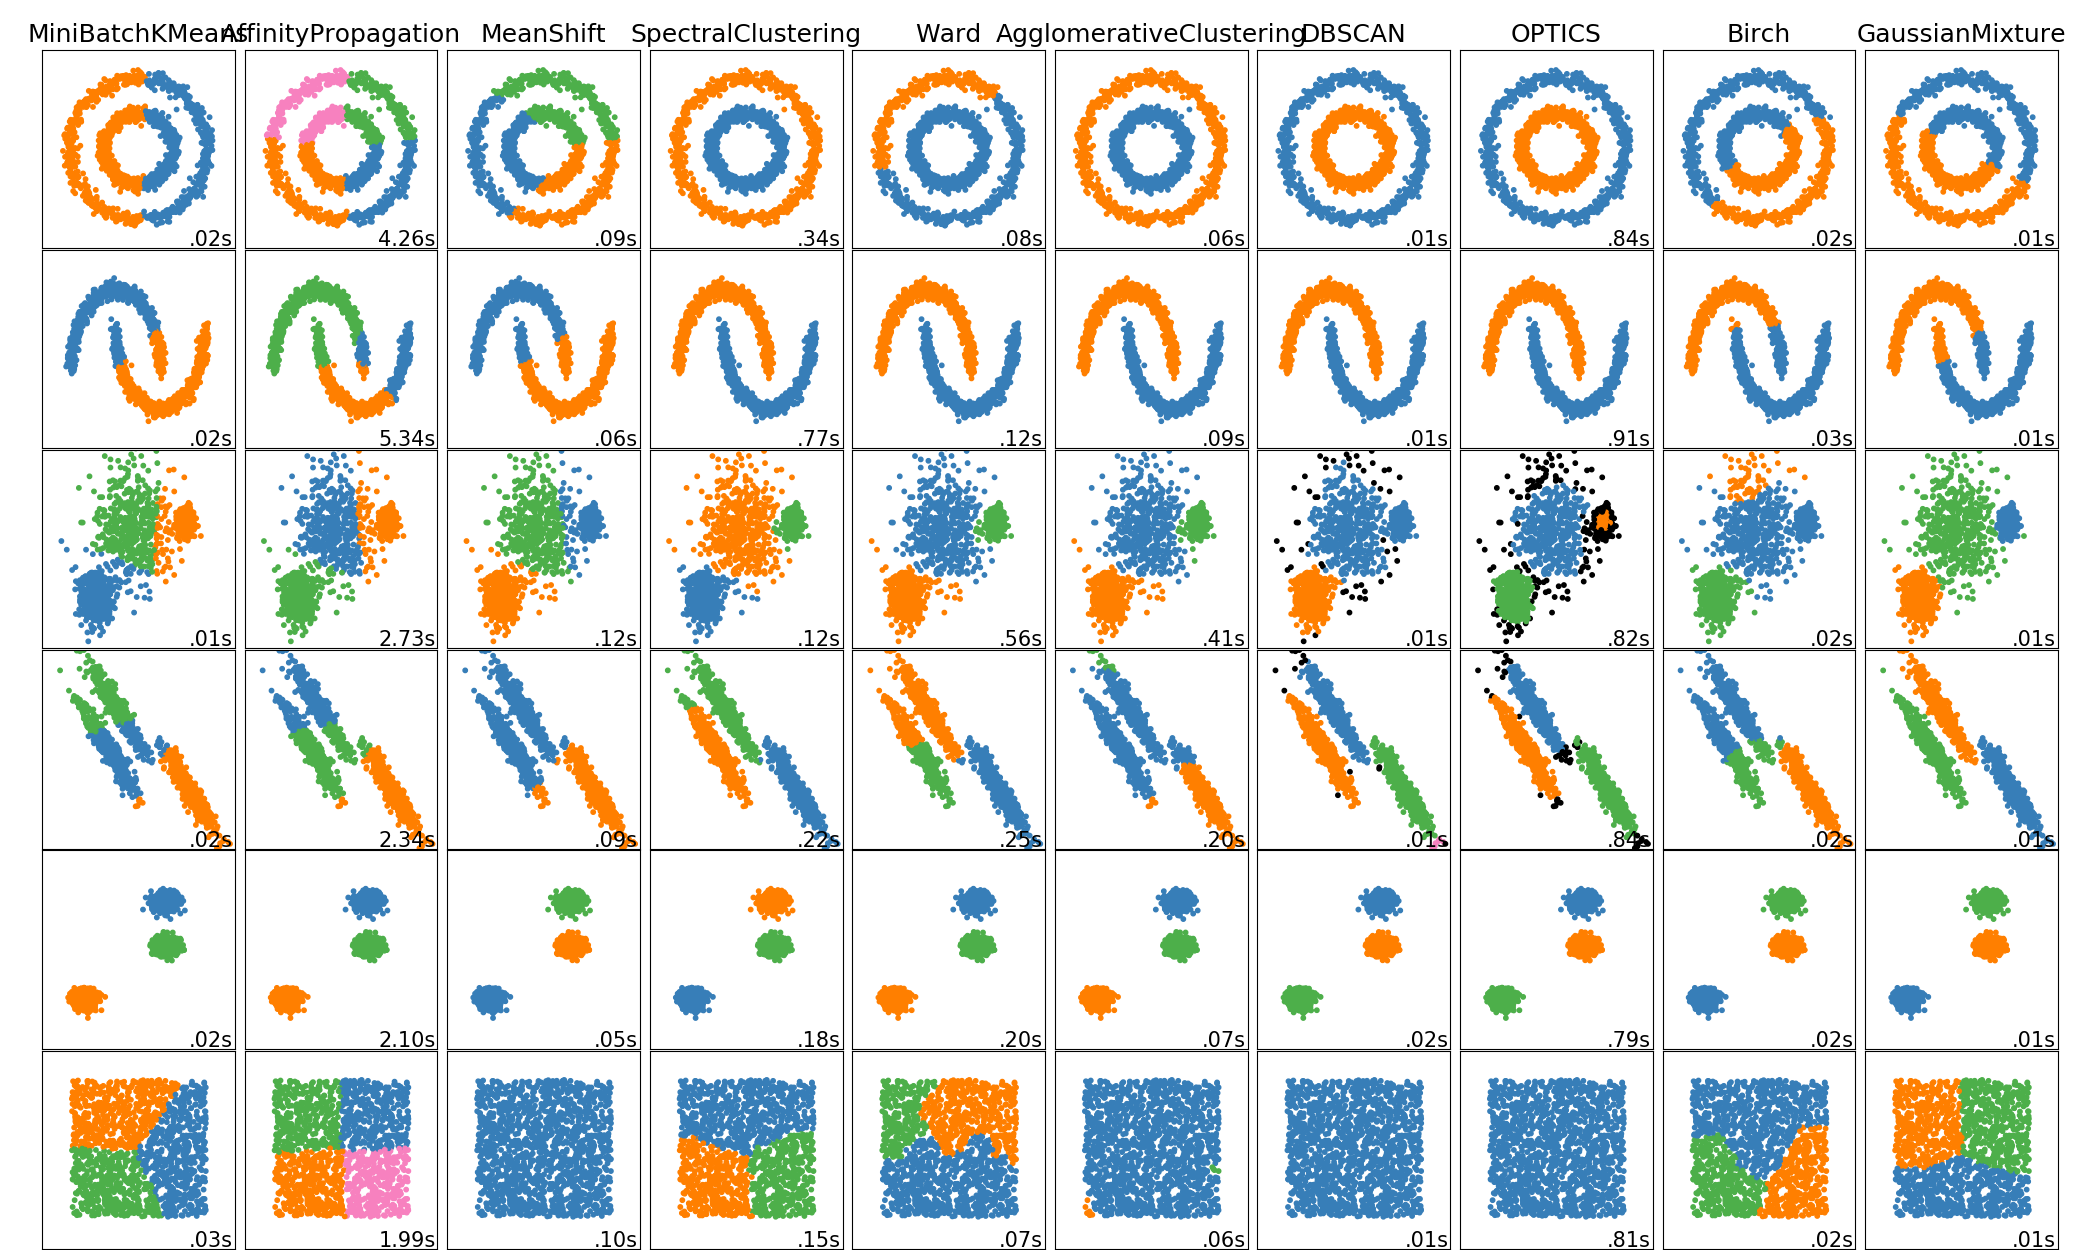

In [98]:
from IPython.display import Image
Image("cluster_methods.png")

## K-means

Partition datasets into $C_1$, $C_2$, ..., $C_K$ to minimize a criterion known as the inertia:
$$ \sum_{k=1}^K \sum_{x \in C_k}||x - m_k||^2$$


Lloyd’s algorithm:

1. Initial center $m_k$, $k=1,...,K$


2. Assign each $x_i$ to its nearest centers
$$A(x_i)=argmin_{k} ||x_i - m_k||^2$$

3. Update cluster for $k=1,...,K$
$$C_k = \{x_i: A(x_i)=k\}$$

4. Recalculate centers
$$m_k=\frac{1}{|C_k|}\sum_{x_i \in C_k}x_i$$

5. Return to step 2 until met stopping crieteria


Remark: Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids.

In KMeans() from sklearn,
__n_init__(default=10) is a number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

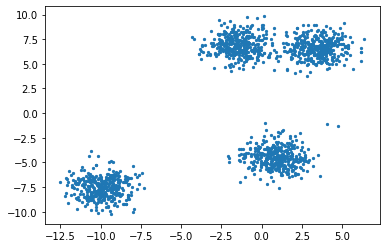

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#Generate isotropic Gaussian blobs for clustering.
X, y = make_blobs(n_samples=1500, centers=4, random_state=100)

plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()

In [10]:
km2 = KMeans(n_clusters=2)
km2.fit(X)
y_km2 = km2.predict(X)

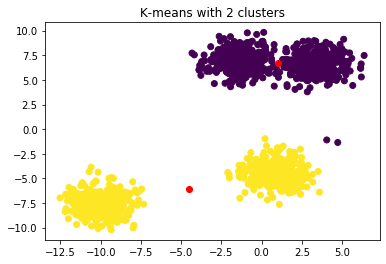

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y_km2, cmap='viridis')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1], c='red')
plt.title("K-means with 2 clusters")
plt.show()

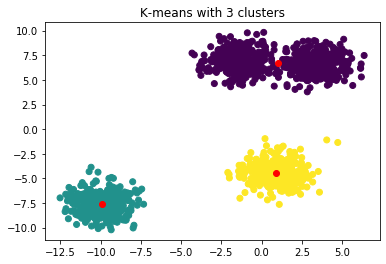

In [12]:
km3 = KMeans(n_clusters=3)
km3.fit(X)
y_km3 = km3.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_km3, cmap='viridis')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1], c='red')
plt.title("K-means with 3 clusters")
plt.show()

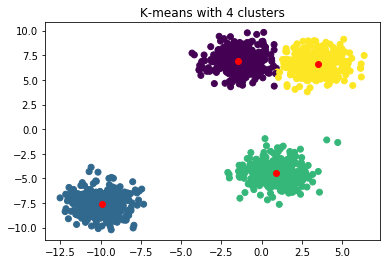

In [13]:
km4 = KMeans(n_clusters=4)
km4.fit(X)
y_km4 = km4.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_km4, cmap='viridis')
plt.scatter(km4.cluster_centers_[:,0],km4.cluster_centers_[:,1], c='red')
plt.title("K-means with 4 clusters")
plt.show()

### Choosing the Appropriate Number of Clusters
In this section, you’ll look at two methods that are commonly used to evaluate the appropriate number of clusters:

1. The elbow method
2. The silhouette coefficient


__1. The elbow method__

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=3:

In [3]:
# A list holds the SSE values for each k
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

sse = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 8), sse)
plt.xticks(range(1, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

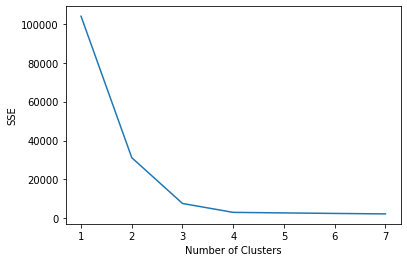

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically:

In [13]:
from kneed import KneeLocator

kl = KneeLocator(
    range(1, 8), sse, curve="convex", direction="decreasing"
    )
kl.elbow

3

__2. The silhouette coefficient__

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:
* How close the data point is to other points in the cluster
* How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [14]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

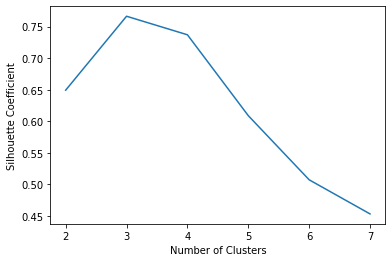

In [15]:
plt.plot(range(2, 8), silhouette_coefficients)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Evaluating clustering performance if ground truth is known
If the ground truth labels are known, it’s possible to use a clustering metric that considers labels in its evaluation. Unlike the silhouette coefficient, __adjusted rand index (ARI)__ uses true cluster assignments to measure the similarity between true and predicted labels.

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

$RI= (TP + TN)  /  (TP + FP + TN + FN) = (TP + TN)  /  (n \,choose\, 2)$

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

$ARI = (RI - Expected_{RI}) / (max(RI) - Expected_{RI})$

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).


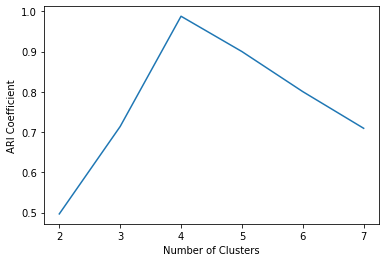

In [18]:
from sklearn.metrics import adjusted_rand_score
ARI=[]
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    ARI_score = adjusted_rand_score(y, kmeans.labels_) # y is the true lable
    ARI.append(ARI_score)

plt.plot(range(2, 8), ARI)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("ARI Coefficient")
plt.show()

### Write your own K-means

In [72]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, max_iter, random_state):
    index=np.random.RandomState(random_state).permutation(X.shape[0])[:n_clusters]
    center=X[index]
    
    while max_iter:
        pred_label=pairwise_distances_argmin(X, center)
        center_new=np.array([X[pred_label==i].mean(axis=0) for i in range(n_clusters)])
        if np.all(center_new==center):
            break
        center=center_new
        max_iter-=1
        
    return center, pred_label

In [88]:
# use function 'predlabel(X, center)' to replace 'pairwise_distances_argmin(X, center)'
def predlabel(X, center):
    pred_label=[]
    for x in X:
        dist=np.sqrt(((np.array([x]*center.shape[0])-center)**2).sum(axis=1))
        pred_label.append(np.argmin(dist))
    return np.array(pred_label)

def find_clusters2(X, n_clusters, max_iter, random_state):
    index=np.random.RandomState(random_state).permutation(X.shape[0])[:n_clusters]
    center=X[index]
    
    while max_iter:
        pred_label=predlabel(X, center)
        center_new=np.array([X[pred_label==i].mean(axis=0) for i in range(n_clusters)])
        if np.all(center_new==center):
            break
        center=center_new
        max_iter-=1
        
    return center, pred_label

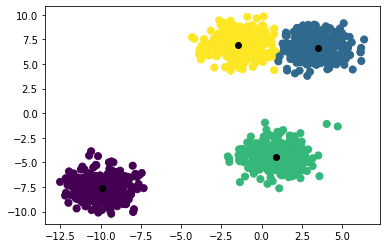

In [89]:
centers, labels=find_clusters2(X, n_clusters=4, max_iter=300, random_state=10)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], color='black');

### Resources: 
In depth K-means https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

## Hierarchical Clustering

A method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

__Agglomerative__: This is a "bottom-up" approach- each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

__Divisive__: This is a "top-down" approach- all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

* Metric:
    
Euclidean distance:
$||a−b||_2=\sqrt{\sum_i(a_i−b_i)^2}$

Manhattan distance: 
$||a−b||_1=\sum_i|a_i−b_i|$

Mahalanobis distance:
$d(a,b)=\sqrt{(a-b)^T S^{-1} (a-b)}$

* Linkage:

The linkage criterion determines the distance between sets of observations as a function of the pairwise distances between observations.

Single-linkage (minimum):
$min\{d(a,d): a\in A, b \in B\}$

Complete-linkage (maximum):
$max\{d(a,d): a\in A, b \in B\}$

Unweighted average linkage:
$\frac{1}{|A|*|B|}\sum_{a \in A, b \in B} d(a,b)$

Ward's:
minimizes the total within-cluster variance. To implement this method, at each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging.

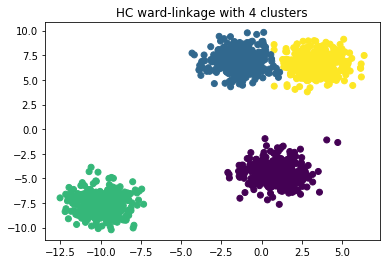

In [14]:
from sklearn.cluster import AgglomerativeClustering
HCward=AgglomerativeClustering(n_clusters=4, linkage='ward')
HCward.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=HCward.labels_, cmap='viridis')
plt.title('HC ward-linkage with 4 clusters')
plt.show()

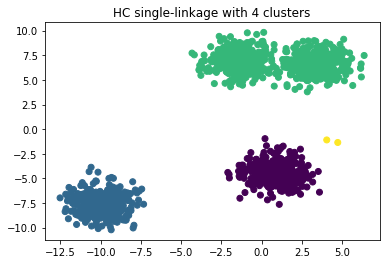

In [15]:
HCsingle=AgglomerativeClustering(n_clusters=4, linkage='single')
HCsingle.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=HCsingle.labels_, cmap='viridis')
plt.title('HC single-linkage with 4 clusters')
plt.show()

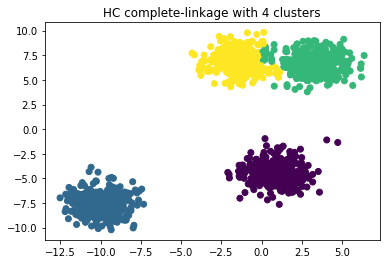

In [16]:
HCcomplete=AgglomerativeClustering(n_clusters=4, linkage='complete')
HCcomplete.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=HCcomplete.labels_, cmap='viridis')
plt.title('HC complete-linkage with 4 clusters')
plt.show()

### HC tree- Dendrogram 

tree height: the value of the criterion associated with the clustering method for the particular agglomeration

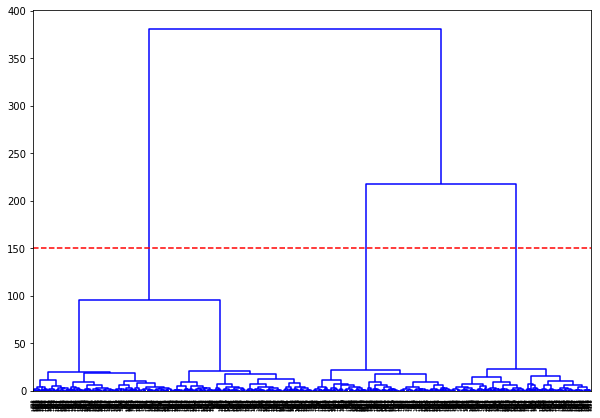

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           color_threshold=-1,
           orientation='top',
           )
plt.axhline(y=150, color='r', linestyle='--')
plt.show()

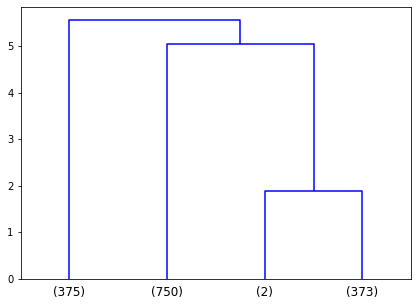

In [19]:
linked = linkage(X, 'single')

# truncated and count each cluster
plt.figure(figsize=(7, 5))
dendrogram(linked,
           p=4, 
           truncate_mode='lastp',
           color_threshold=-1,
           orientation='top',
           show_leaf_counts=True
           )
plt.show()

## Heatmap

In [90]:
import seaborn as sns
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


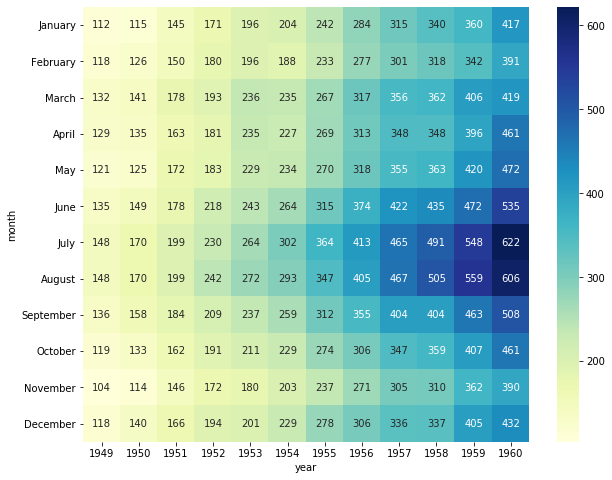

In [94]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(flights, cmap="YlGnBu", annot=True, fmt="d")

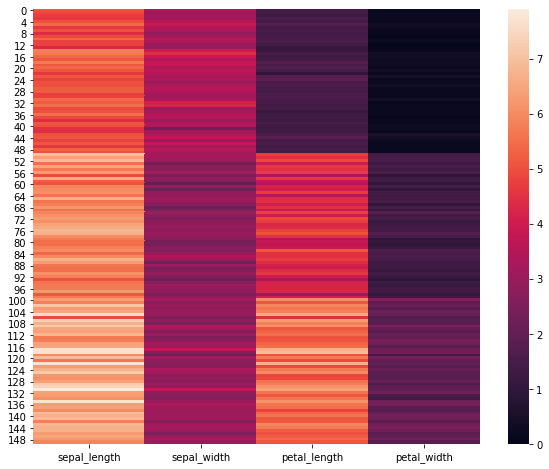

In [97]:
iris = sns.load_dataset("iris")
iris_X=iris.iloc[:,0:4]

plt.figure(figsize=(10, 8))
ax = sns.heatmap(iris_X, vmin=0)

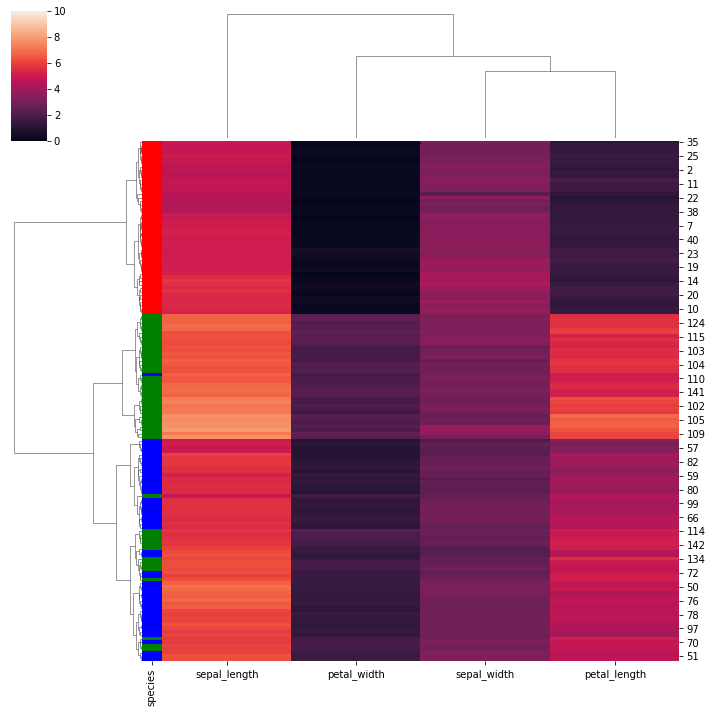

In [86]:
# put HC tree on row and/or column side
# add row color indicating differnt species
lut = dict(zip(iris['species'].unique(), "rbg"))
row_col=iris['species'].map(lut)

g = sns.clustermap(iris_X, row_colors=row_col, method="ward", vmin=0, vmax=10)

## Dimension Reduction

### PCA
Assume the dataset is centered. PCA projects datasets onto a low-dimensional subspace or hyperplane, such that it preserves the maximum variance.

The first principle component is
$$v_1=argmax_{||v||_2=1} \frac{1}{n}\sum_{i=1}^n (x_i^T v)^2=argmax_{||v||_2=1} \frac{1}{n} v^T X^T Xv $$
which is the first eigen vector of matrix $X^T X$.

The kth component can be found by subtracting the first k−1 principal components from $X$:
$$X_k=X- \sum_{s=1}^{k-1} Xv_s v_s^T$$
and then finding the weight vector which extracts the maximum variance from this new data matrix $X_k$.
It turns out that this gives the remaining eigenvectors of $X^T X$.

Consider Single Vector Decomposition (SVD) of $n\times p$ matrix $X$:
$$X=U \Sigma V^T$$
$U$ is a $n\times n$ unitary matrix, $\Sigma$ is an $n\times p$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $V$  is an $p\times p$ unitary matrix.

$$X^T X= V (\Sigma^T \Sigma) V^T$$
where $V$ (columns) contains all the principal components we are looking for.


__Dimension reduction__ (from p to d):

Imply the first d principal components (first d columns) of $V$, named $V_d$, to $X$:
$$X^{new}=X V_d = U_d \Sigma_d$$

__Inverse__ the transformtion (from d to p):

$$X^{recovered}= X^{new} V_d^T$$

In [108]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

iris_X_centered= iris_X - iris_X.mean(axis=0)
pca.fit(iris_X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [109]:
pca.components_.T

array([[ 0.36138659,  0.65658877],
       [-0.08452251,  0.73016143],
       [ 0.85667061, -0.17337266],
       [ 0.3582892 , -0.07548102]])

In [111]:
# compare it with the first two columns of matrix V in svd
# the signs sometimes are different
u,s,vh=np.linalg.svd(iris_X_centered)
vh.T[:,0:2]

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

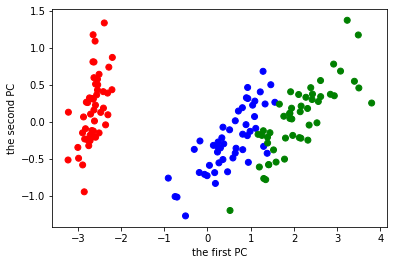

In [135]:
X_pca=pca.transform(iris_X_centered)
plt.scatter(X_pca[:,0],X_pca[:,1],c=row_col)
plt.xlabel('the first PC')
plt.ylabel('the second PC')
plt.show()

In [150]:
from sklearn.metrics import mean_squared_error

# Project back to the original dimension
X_recovered=pca.inverse_transform(X_pca)

# Reconstruction error: mean squared distance between the original data and the reconstructed data
mean_squared_error(iris_X_centered, X_recovered)

0.025341073932398255

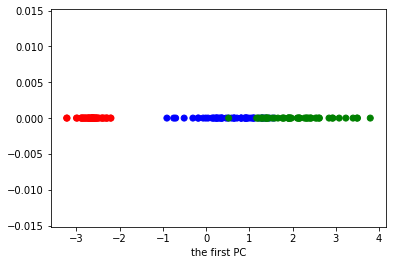

In [134]:
pca1d=PCA(n_components=1)
X_pca1d=pca1d.fit_transform(iris_X_centered)
plt.scatter(X_pca[:,0],np.zeros(X_pca1d.shape),c=row_col)
plt.xlabel('the first PC')
plt.show()

Explained Variance Ratio

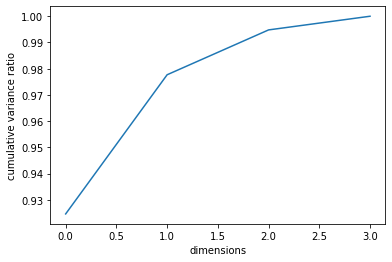

In [169]:
pca=PCA()
pca.fit(iris_X_centered)
cumsum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('dimensions')
plt.ylabel('cumulative variance ratio')
plt.show()

### Kernel PCA (kernel trick)
It performs non-linear projections for dimension reduction.

The first principle component now is
$$v_1=argmin_{||v||_2=1} \frac{1}{n} v^T \phi(X)^T \phi(X)v $$
which is the first eigen vector of $\phi(X)^T \phi(X)$.

Defining a kernel function:
$$K(x_i,x_j)=\phi(x_i)^T \phi(x_j)$$
we don't need to know the exact mapping $\phi$ or the high-dim projection space.

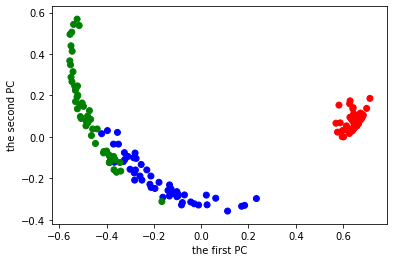

In [162]:
from sklearn.decomposition import KernelPCA
pca_rbf=KernelPCA(n_components=2, kernel='rbf', gamma=0.05)
X_pca_rbf=pca_rbf.fit_transform(iris_X_centered)
plt.scatter(X_pca_rbf[:,0],X_pca_rbf[:,1],c=row_col)
plt.xlabel('the first PC')
plt.ylabel('the second PC')
plt.show()

## Association- Mutual Information

Mutual Information(MI) quantifies the average Shannon's entropy shared by two variables.

$$MI (X,Y)=\sum_i P(Y_i,X_i) log \frac{P(Y_i|X_i)}{P(Y_i)}$$

Entropy:

$$H (X)=- \sum_i P(X_i) log P(X_i)$$

$$H (X,Y)=- \sum_i P(X_i,Y_i) log P(X_i,Y_i)$$

Actually,
$MI (X,X)=H (X)$, $MI (Y,Y)=H (Y)$, and $MI(X,Y)=H (X)+H (Y)-H (X,Y)$

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [2]:
from sklearn.preprocessing import KBinsDiscretizer

bin0=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X0_bin=bin0.fit_transform(X[:,0].reshape(-1,1)).ravel()

bin1=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X1_bin=bin1.fit_transform(X[:,1].reshape(-1,1)).ravel()

In [20]:
X0_bin

array([2., 1., 1., 0., 1., 3., 0., 1., 0., 1., 3., 1., 1., 0., 4., 3., 3.,
       2., 3., 2., 3., 2., 0., 2., 1., 1., 1., 2., 2., 1., 1., 3., 2., 3.,
       1., 1., 3., 1., 0., 2., 1., 0., 0., 1., 2., 1., 2., 0., 2., 1., 7.,
       5., 7., 3., 6., 3., 5., 1., 6., 2., 1., 4., 4., 5., 3., 6., 3., 4.,
       5., 3., 4., 5., 5., 5., 5., 6., 6., 6., 4., 3., 3., 3., 4., 4., 3.,
       4., 6., 5., 3., 3., 3., 5., 4., 1., 3., 3., 3., 5., 2., 3., 5., 4.,
       7., 5., 6., 9., 1., 8., 6., 8., 6., 5., 6., 3., 4., 5., 6., 9., 9.,
       4., 7., 3., 9., 5., 6., 8., 5., 5., 5., 8., 8., 9., 5., 5., 5., 9.,
       5., 5., 4., 7., 6., 7., 4., 6., 6., 6., 5., 6., 5., 4.])

In [21]:
X1_bin

array([6., 4., 5., 4., 6., 7., 5., 5., 3., 4., 7., 5., 4., 4., 8., 9., 7.,
       6., 7., 7., 5., 7., 6., 5., 5., 4., 5., 6., 5., 5., 4., 5., 8., 9.,
       4., 5., 6., 6., 4., 5., 6., 1., 5., 6., 7., 4., 7., 5., 7., 5., 5.,
       5., 4., 1., 3., 3., 5., 1., 3., 2., 0., 4., 0., 3., 3., 4., 4., 2.,
       0., 2., 5., 3., 2., 3., 3., 4., 3., 4., 3., 2., 1., 1., 2., 2., 4.,
       5., 4., 1., 4., 2., 2., 4., 2., 1., 2., 4., 3., 3., 2., 3., 5., 2.,
       4., 3., 4., 4., 2., 3., 2., 6., 5., 2., 4., 2., 3., 5., 4., 7., 2.,
       0., 5., 3., 3., 2., 5., 5., 3., 4., 3., 4., 3., 7., 3., 3., 2., 4.,
       5., 4., 4., 4., 4., 4., 2., 5., 5., 4., 2., 4., 5., 4.])

In [5]:
from sklearn.metrics import mutual_info_score
# mutual information of X0 and X1
mutual_info_score(X0_bin,X1_bin)

0.4632707994534285

In [6]:
# entropy of X0
mutual_info_score(X0_bin,X0_bin)

2.154150557172522

In [7]:
# entropy of X1
mutual_info_score(X1_bin,X1_bin)

1.972797773096665